In [31]:
import sys
sys.path.append("../lib/")
sys.path.append("../")

import torch
from bert import *
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

import torch
from bert import *
from feature_data import *
from multiprototype import *
from models import *
from utils import *
from nltk.corpus import wordnet as wn
from nltk.corpus.reader.wordnet import Lemma
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [36]:
bert = BERTBase()

INFO:pytorch_pretrained_bert.modeling:loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at /Users/gabriellachronis/.pytorch_pretrained_bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
INFO:pytorch_pretrained_bert.modeling:extracting archive file /Users/gabriellachronis/.pytorch_pretrained_bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /var/folders/9m/vzvx58rs51v_x5nm620fz4xr0000gn/T/tmpbfufwisx
INFO:pytorch_pretrained_bert.modeling:Model config {
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "type_vocab_size": 2,
  "vocab_size": 3

In [37]:
"""
take a look at the eval words
"""
pd.set_option('display.max_colwidth', None)
eval_words = pd.read_csv('../data/bnc_contexts_for_mcrae_homonyms.csv')
eval_words

,cue_word,lemma,context
0,bat_animal,Lemma('bat.n.01.bat'),"Or the surging whirling sounds of bats at night , when their black bodies dived into the blackness above and below the amber street lights ."
1,bat_animal,Lemma('bat.n.01.bat'),"Out of the church and into his big car , it tooling over the road with him driving and the headlights sweeping the pike ahead and after he hit college , his expansiveness , the quaint little pine board tourist courts , cabins really , with a cute naked light bulb in the ceiling ( unfrosted and naked as a streetlight , like the one on the corner where you used to play when you were a kid , where you watched the bats swooping in after the bugs , watching in between your bouts at hopscotch ) , a room complete with moths pinging the light and the few casual cockroaches cruising the walls , an insect Highway Patrol with feelers waving ."
2,board_wood,Lemma('board.n.02.board'),He just shot at the board and then drew circles around the holes to form a bull's-eye .
3,board_wood,Lemma('board.n.02.board'),Then I cover the sowing with a board .
4,board_wood,Lemma('board.n.02.board'),When the first sprinkling of green appears I remove the board .
5,board_wood,Lemma('board.n.02.board'),"Standing in the shelter of the tent - a rejected hospital tent on which the rain now dripped , no longer drumming - Adam watched his own hands touch the objects on the improvised counter of boards laid across two beef barrels ."
6,board_wood,Lemma('board.n.02.board'),"Beyond that misty gray of the rain , he saw the stretching hutment , low diminutive log cabins , chinked with mud , with doorways a man would have to crouch to get through , with roofs of tenting laid over boughs or boards from hardtack boxes , or fence rails , with cranky chimneys of sticks and dried mud ."
7,board_wood,Lemma('board.n.02.board'),"Over the door was a board with large , inept lettering :"
8,board_wood,Lemma('board.n.02.board'),"With enormous interest , Adam watched his hands as they touched and shifted the objects on the board directly before him ."
9,board_wood,Lemma('board.n.02.board'),"Alley fences were made of solid boards higher than one 's head , but not so high as the golden glow in a corner or the hollyhocks that grew in a line against them ."


In [3]:
"""
models and save paths

"""
buchanan_models = [
    '../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters',
    '../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters',
    '../trained_models/model.ffnn.buchanan.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300',
    '../trained_models/model.ffnn.buchanan.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300',
    #'../trained_models/model.modabs.buchanan.allbuthomoyms.5k',
    #'../trained_models/model.modabs.buchanan.allbuthomoyms.1k',
]

buchanan_glove_models = [
    '../trained_models/model.plsr.buchanan.allbuthomoyms.glove.300components.300max_iters',
    '../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300',
    #'../trained_models/model.modabs.buchanan.allbuthomoyms.glove'   
]

mcrae_models = [
    '../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300',
    '../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300',
    '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.5k.100components.500max_iters',
    '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.1k.50components.500max_iters',
]

mcrae_glove_models = [
    '../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300',
    '../trained_models/model.plsr.mc_rae_real.allbuthomoyms.glove.100components.300max_iters'
]

# Results analysis

In [4]:
res_df = pd.read_csv('../results/homonymous_words_eval_buchanan_models.csv')
res_df = res_df.rename(columns={'Unnamed: 0': 'token_index'})
res_df.head(5)

,token_index,cue_word,context,lemma,top_10_prec,top_20_prec,top_k_prec,top_10,top_10_gold,top_k,gold_feats,cos,avg_top_10_prec,avg_top_20_prec,avg_top_k_prec,avg_correlation,avg_cosine,model
0,0,bat_animal,"Or the surging whirling sounds of bats at night , when their black bodies dived into the blackness above and below the amber street lights .",Lemma('bat.n.01.bat'),0.2,0.278,0.333,"['large', 'protect', 'black', 'bird', 'fly', 'leg', 'animal', 'small', 'wing', 'insect']","['vampire', 'scare', 'small', 'fang', 'mammal', 'screech', 'navigate', 'radar', 'animal', 'blind']","['number', 'play', 'black', 'leg', 'fur', 'large', 'animal', 'protect', 'feather', 'insect', 'fly', 'bird', 'beak', 'long', 'eat', 'small', 'wing', 'air']","['animal', 'black', 'blind', 'cave', 'down', 'fang', 'fly', 'fur', 'mammal', 'navigate', 'nocturnal', 'radar', 'scare', 'screech', 'sleep', 'small', 'vampire', 'wing']",0.338,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters
1,1,bat_animal,"Out of the church and into his big car , it tooling over the road with him driving and the headlights sweeping the pike ahead and after he hit college , his expansiveness , the quaint little pine board tourist courts , cabins really , with a cute naked light bulb in the ceiling ( unfrosted and naked as a streetlight , like the one on the corner where you used to play when you were a kid , where you watched the bats swooping in after the bugs , watching in between your bouts at hopscotch ) , a room complete with moths pinging the light and the few casual cockroaches cruising the walls , an insect Highway Patrol with feelers waving .",Lemma('bat.n.01.bat'),0.2,0.278,0.333,"['black', 'leg', 'large', 'air', 'small', 'bird', 'insect', 'animal', 'wing', 'fly']","['vampire', 'scare', 'small', 'fang', 'mammal', 'screech', 'navigate', 'radar', 'animal', 'blind']","['light', 'fly', 'leg', 'wing', 'small', 'number', 'black', 'bug', 'fur', 'insect', 'large', 'air', 'play', 'cold', 'animal', 'bird', 'protect', 'feather']","['animal', 'black', 'blind', 'cave', 'down', 'fang', 'fly', 'fur', 'mammal', 'navigate', 'nocturnal', 'radar', 'scare', 'screech', 'sleep', 'small', 'vampire', 'wing']",0.312,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters
2,2,board_wood,He just shot at the board and then drew circles around the holes to form a bull's-eye .,Lemma('board.n.02.board'),0.1,0.143,0.214,"['object', 'flat', 'round', 'write', 'piece', 'play', 'color', 'game', 'sport', 'wood']","['flat', 'hard', 'tree', 'board', 'brown', 'construct', 'dive', 'house', 'ship', 'pirate']","['hard', 'large', 'part', 'end', 'flat', 'object', 'game', 'piece', 'write', 'play', 'color', 'round', 'sport', 'wood']","['board', 'brown', 'build', 'construct', 'dive', 'flat', 'hard', 'house', 'long', 'pirate', 'ship', 'thing', 'tree', 'wood']",0.337,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters
3,3,board_wood,Then I cover the sowing with a board .,Lemma('board.n.02.board'),0.0,0.071,0.214,"['color', 'game', 'object', 'round', 'metal', 'hold', 'wood', 'piece', 'small', 'plastic']","['flat', 'hard', 'tree', 'board', 'brown', 'construct', 'dive', 'house', 'ship', 'pirate']","['hard', 'round', 'metal', 'wood', 'long', 'color', 'hold', 'hand', 'human', 'object', 'game', 'piece', 'small', 'plastic']","['board', 'brown', 'build', 'construct', 'dive', 'flat', 'hard', 'house', 'long', 'pirate', 'ship', 'thing', 'tree', 'wood']",0.357,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters
4,4,board_wood,When the first sprinkling of green appears I remove the board .,Lemma('board.n.02.board'),0.0,0.071,0.214,"['small', 'sport', 'paper', 'round', 'play', 'write', 'game', 'wood', 'color', 'piece']","['flat', 'hard', 'tree', 'board', 'brown', 'construct', 'dive', 'house', 'ship', 'pirate']"

In [5]:
# which model does best?

In [6]:
# which words get highest precision? lowest?

print(res_df.model.unique())

['../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters'
 '../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters'
 '../trained_models/model.ffnn.buchanan.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300'
 '../trained_models/model.ffnn.buchanan.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300'
 '../trained_models/model.plsr.buchanan.allbuthomoyms.glove.300components.300max_iters'
 '../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300']


In [8]:
res_df.columns

Index(['token_index', 'cue_word', 'context', 'lemma', 'top_10_prec',
       'top_20_prec', 'top_k_prec', 'top_10', 'top_10_gold', 'top_k',
       'gold_feats', 'cos', 'avg_top_10_prec', 'avg_top_20_prec',
       'avg_top_k_prec', 'avg_correlation', 'avg_cosine', 'model'],
      dtype='object')

In [12]:
# get best and worst performing words on plsr 5k --- avg prec .5
res_df[res_df.model == '../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters'
].sort_values(by=['top_k_prec'], ascending=False).head(5)


,token_index,cue_word,context,lemma,top_10_prec,top_20_prec,top_k_prec,top_10,top_10_gold,top_k,gold_feats,cos,avg_top_10_prec,avg_top_20_prec,avg_top_k_prec,avg_correlation,avg_cosine,model
52,52,tank_container,There are some sharp and whipping lines and some hilariously funny situations - the best of the latter being a mass impromptu plunge into a nightclub tank where a `` mermaid '' is performing .,Lemma('tank.n.02.tank'),0.6,0.583,0.583,"['store', 'metal', 'fish', 'hold', 'swim', 'liquid', 'water', 'person', 'contain', 'large']","['glass', 'size', 'store', 'water', 'fish', 'keep', 'large', 'liquid', 'plastic', 'metal']","['small', 'car', 'store', 'metal', 'fish', 'hold', 'swim', 'liquid', 'water', 'person', 'contain', 'large']","['fish', 'glass', 'hold', 'keep', 'large', 'liquid', 'metal', 'plastic', 'size', 'store', 'thing', 'water']",0.416,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters
54,54,tank_container,The raw sewage was introduced directly under the turbine aerator to insure maximum mixing of the raw sewage with the aeration tank contents .,Lemma('tank.n.02.tank'),0.5,0.500,0.500,"['transport', 'store', 'large', 'animal', 'contain', 'metal', 'place', 'liquid', 'hold', 'water']","['glass', 'size', 'store', 'water', 'fish', 'keep', 'large', 'liquid', 'plastic', 'metal']","['carry', 'swim', 'transport', 'store', 'large', 'animal', 'contain', 'metal', 'place', 'liquid', 'hold', 'water']","['fish', 'glass', 'hold', 'keep', 'large', 'liquid', 'metal', 'plastic', 'size', 'store', 'thing', 'water']",0.447,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters
17,17,board_wood,"Without further discussion he appeared the next morning with a pile of boards sticking over the end of his light truck and proceeded with the paneling , which he then stained and waxed according to his taste .",Lemma('board.n.02.board'),0.3,0.357,0.500,"['cover', 'house', 'hard', 'wood', 'tree', 'build', 'metal', 'piece', 'cloth', 'material']","['flat', 'hard', 'tree', 'board', 'brown', 'construct', 'dive', 'house', 'ship', 'pirate']","['brown', 'construct', 'walk', 'color', 'cover', 'house', 'hard', 'wood', 'tree', 'build', 'metal', 'piece', 'cloth', 'material']","['board', 'brown', 'build', 'construct', 'dive', 'flat', 'hard', 'house', 'long', 'pirate', 'ship', 'thing', 'tree', 'wood']",0.498,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters
53,53,tank_container,Matheson highest purity tank chlorine was passed through a tube of resublimed * * f into an evacuated Pyrex system where it was condensed with liquid air .,Lemma('tank.n.02.tank'),0.4,0.417,0.500,"['car', 'metal', 'large', 'water', 'food', 'person', 'round', 'liquid', 'hold', 'place']","['glass', 'size', 'store', 'water', 'fish', 'keep', 'large', 'liquid', 'plastic', 'metal']","['store', 'contain', 'car', 'metal', 'large', 'water', 'food', 'person', 'round', 'liquid', 'hold', 'place']","['fish', 'glass', 'hold', 'keep', 'large', 'liquid', 'metal', 'plastic', 'size', 'store', 'thing', 'water']",0.361,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters
31,31,mouse,"For the marksman , we study sets of five shots ( * * f ) ; for the mice , we restrict attention to litters of eight ( * * f ) ; and for the aces , we toss three dice ( * * f ) .",Lemma('mouse.n.01.mouse'),0.0,0.200,0.465,"['white', 'person', 'mammal', 'four', 'tail', 'leg', 'eat', 'animal', 'fur', 'small']","['big', 'dig', 'fast', 'food', 'funny', 'inside', 'kill', 'live', 'outside', 'scare']","['rodent', 'live', 'long', 'vegetable', 'red', 'carnivore', 'hoof', 'group', 'dirt', 'zoo', 'feather', 'hunt', 'walk', 'teeth', 'domestic', 'eye', 'play', 'cat', 'yellow', 'young', 'smell', 'fly', 'hair', 'farm', 'cute', 'black', 'ear', 'leg', 'wild', 'pet', 'mammal', 'person', 'fur', 'white', 'large', 'ani

In [13]:
res_df[res_df.model == '../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters'
].sort_values(by=['top_k_prec'], ascending=True).head(5)

,token_index,cue_word,context,lemma,top_10_prec,top_20_prec,top_k_prec,top_10,top_10_gold,top_k,gold_feats,cos,avg_top_10_prec,avg_top_20_prec,avg_top_k_prec,avg_correlation,avg_cosine,model
21,21,cap_bottle,"He said fussily , `` Just keep the cap on those strong emotions '' .",Lemma('cap.n.02.cap'),0.100,0.091,0.091,"['object', 'warm', 'wood', 'cold', 'top', 'plastic', 'hold', 'wear', 'cover', 'protect']","['ensure', 'fresh', 'bottle', 'close', 'seal', 'open', 'metal', 'plastic', 'small', 'round']","['drink', 'object', 'warm', 'wood', 'cold', 'top', 'plastic', 'hold', 'wear', 'cover', 'protect']","['bottle', 'close', 'ensure', 'fresh', 'metal', 'open', 'plastic', 'round', 'seal', 'small', 'twist']",0.207,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters
22,22,cap_bottle,Hans cut the foil off finally and unscrewed the cap .,Lemma('cap.n.02.cap'),0.100,0.091,0.091,"['hold', 'warm', 'water', 'part', 'wear', 'cover', 'plastic', 'protect', 'contain', 'top']","['ensure', 'fresh', 'bottle', 'close', 'seal', 'open', 'metal', 'plastic', 'small', 'round']","['cloth', 'hold', 'warm', 'water', 'part', 'wear', 'cover', 'plastic', 'protect', 'contain', 'top']","['bottle', 'close', 'ensure', 'fresh', 'metal', 'open', 'plastic', 'round', 'seal', 'small', 'twist']",0.153,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters
37,37,pipe_smoking,He finished with the team and filled his pipe and stood looking about him .,Lemma('pipe.n.01.pipe'),0.125,0.125,0.125,"['hot', 'light', 'fire', 'drink', 'air', 'long', 'round', 'water', 'smoke', 'metal']","['drug', 'man', 'old', 'inhale', 'wood', 'smell', 'tobacco', 'smoke']","['long', 'round', 'fire', 'drink', 'air', 'water', 'smoke', 'metal']","['drug', 'inhale', 'man', 'old', 'smell', 'smoke', 'tobacco', 'wood']",0.226,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters
38,38,pipe_smoking,"He would order her to bring coffee , and would take from his vest pocket a thin black pipe which he would stuff - he would not remove his gloves - and light and smoke .",Lemma('pipe.n.01.pipe'),0.250,0.250,0.125,"['water', 'wood', 'smoke', 'round', 'drink', 'long', 'air', 'fire', 'hot', 'metal']","['drug', 'man', 'old', 'inhale', 'wood', 'smell', 'tobacco', 'smoke']","['smoke', 'round', 'drink', 'long', 'air', 'fire', 'hot', 'metal']","['drug', 'inhale', 'man', 'old', 'smell', 'smoke', 'tobacco', 'wood']",0.200,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters
4,4,board_wood,When the first sprinkling of green appears I remove the board .,Lemma('board.n.02.board'),0.000,0.071,0.214,"['small', 'sport', 'paper', 'round', 'play', 'write', 'game', 'wood', 'color', 'piece']","['flat', 'hard', 'tree', 'board', 'brown', 'construct', 'dive', 'house', 'ship', 'pirate']","['flat', 'plastic', 'hard', 'paper', 'small', 'sport', 'object', 'round', 'play', 'write', 'game', 'wood', 'color', 'piece']","['board', 'brown', 'build', 'construct', 'dive', 'flat', 'hard', 'house', 'long', 'pirate', 'ship', 'thing', 'tree', 'wood']",0.316,0.177,0.258,0.341,0.087,0.37,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters


In [16]:
# get best and worst performing words on plsr 1k --- avg prec .5
res_df[res_df.model == '../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters'
].sort_values(by=['top_k_prec'], ascending=False).head(5)


,token_index,cue_word,context,lemma,top_10_prec,top_20_prec,top_k_prec,top_10,top_10_gold,top_k,gold_feats,cos,avg_top_10_prec,avg_top_20_prec,avg_top_k_prec,avg_correlation,avg_cosine,model
107,52,tank_container,There are some sharp and whipping lines and some hilariously funny situations - the best of the latter being a mass impromptu plunge into a nightclub tank where a `` mermaid '' is performing .,Lemma('tank.n.02.tank'),0.6,0.583,0.583,"['store', 'fish', 'small', 'contain', 'water', 'liquid', 'large', 'person', 'metal', 'hold']","['glass', 'size', 'store', 'water', 'fish', 'keep', 'large', 'liquid', 'plastic', 'metal']","['swim', 'air', 'store', 'fish', 'small', 'contain', 'water', 'liquid', 'large', 'person', 'metal', 'hold']","['fish', 'glass', 'hold', 'keep', 'large', 'liquid', 'metal', 'plastic', 'size', 'store', 'thing', 'water']",0.372,0.165,0.253,0.329,0.083,0.343,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters
109,54,tank_container,The raw sewage was introduced directly under the turbine aerator to insure maximum mixing of the raw sewage with the aeration tank contents .,Lemma('tank.n.02.tank'),0.5,0.500,0.500,"['store', 'round', 'contain', 'metal', 'liquid', 'place', 'animal', 'large', 'hold', 'water']","['glass', 'size', 'store', 'water', 'fish', 'keep', 'large', 'liquid', 'plastic', 'metal']","['small', 'swim', 'round', 'store', 'contain', 'metal', 'liquid', 'place', 'animal', 'large', 'hold', 'water']","['fish', 'glass', 'hold', 'keep', 'large', 'liquid', 'metal', 'plastic', 'size', 'store', 'thing', 'water']",0.407,0.165,0.253,0.329,0.083,0.343,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters
97,42,pipe_plumbing,It consists of a series of pipes and a pressure measuring chamber which record the rise and fall of the water surface .,Lemma('pipe.n.02.pipe'),0.2,0.429,0.500,"['hot', 'long', 'hole', 'liquid', 'hold', 'water', 'metal', 'part', 'kitchen', 'round']","['connect', 'leak', 'liquid', 'plastic', 'transport', 'copper', 'hard', 'carry', 'hold', 'hollow']","['plastic', 'air', 'swim', 'through', 'hot', 'long', 'hole', 'liquid', 'hold', 'water', 'metal', 'part', 'kitchen', 'round']","['carry', 'connect', 'copper', 'hard', 'hold', 'hollow', 'leak', 'liquid', 'long', 'metal', 'plastic', 'round', 'transport', 'water']",0.375,0.165,0.253,0.329,0.083,0.343,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters
72,17,board_wood,"Without further discussion he appeared the next morning with a pile of boards sticking over the end of his light truck and proceeded with the paneling , which he then stained and waxed according to his taste .",Lemma('board.n.02.board'),0.2,0.286,0.500,"['cloth', 'hard', 'cover', 'tree', 'color', 'piece', 'metal', 'wood', 'build', 'material']","['flat', 'hard', 'tree', 'board', 'brown', 'construct', 'dive', 'house', 'ship', 'pirate']","['hold', 'cover', 'long', 'cloth', 'house', 'hard', 'construct', 'tree', 'color', 'piece', 'metal', 'wood', 'build', 'material']","['board', 'brown', 'build', 'construct', 'dive', 'flat', 'hard', 'house', 'long', 'pirate', 'ship', 'thing', 'tree', 'wood']",0.479,0.165,0.253,0.329,0.083,0.343,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters
89,34,mouse,"The debris of his other careers was piled everywhere ; a pile of wire cages for mice from his time as a geneticist and a microscope lying on its side on the window sill , vertical steel columns wired for support to the open ceiling beams with spidery steel cantilevers jutting out into the air , masonry constructions on the floor from the time he was inventing his disastrous fireplace whose smoke would pass through a whole house , visible all the way up through wire gratings on each floor .",Lemma('mouse.n.01.mouse'),0.0,0.200,0.442,"['white', 'pet', 'four', 'leg', 'animal', 'tail', 'small', 'mammal', 'fur', 'eat']","['big', 'dig', 'fast', 'food', 'funny', 'inside', 'kill', 'live', 'outsi

In [17]:
res_df[res_df.model == '../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters'
].sort_values(by=['top_k_prec'], ascending=True).head(5)

,token_index,cue_word,context,lemma,top_10_prec,top_20_prec,top_k_prec,top_10,top_10_gold,top_k,gold_feats,cos,avg_top_10_prec,avg_top_20_prec,avg_top_k_prec,avg_correlation,avg_cosine,model
77,22,cap_bottle,Hans cut the foil off finally and unscrewed the cap .,Lemma('cap.n.02.cap'),0.10,0.091,0.091,"['warm', 'contain', 'part', 'wear', 'protect', 'cover', 'plastic', 'water', 'top', 'color']","['ensure', 'fresh', 'bottle', 'close', 'seal', 'open', 'metal', 'plastic', 'small', 'round']","['hold', 'warm', 'contain', 'part', 'wear', 'protect', 'cover', 'plastic', 'water', 'top', 'color']","['bottle', 'close', 'ensure', 'fresh', 'metal', 'open', 'plastic', 'round', 'seal', 'small', 'twist']",0.167,0.165,0.253,0.329,0.083,0.343,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters
92,37,pipe_smoking,He finished with the team and filled his pipe and stood looking about him .,Lemma('pipe.n.01.pipe'),0.25,0.250,0.125,"['smell', 'round', 'hot', 'metal', 'light', 'fire', 'drink', 'water', 'smoke', 'air']","['drug', 'man', 'old', 'inhale', 'wood', 'smell', 'tobacco', 'smoke']","['hot', 'light', 'metal', 'fire', 'drink', 'water', 'smoke', 'air']","['drug', 'inhale', 'man', 'old', 'smell', 'smoke', 'tobacco', 'wood']",0.225,0.165,0.253,0.329,0.083,0.343,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters
93,38,pipe_smoking,"He would order her to bring coffee , and would take from his vest pocket a thin black pipe which he would stuff - he would not remove his gloves - and light and smoke .",Lemma('pipe.n.01.pipe'),0.25,0.250,0.125,"['air', 'fire', 'hand', 'wood', 'smoke', 'hot', 'round', 'long', 'drink', 'metal']","['drug', 'man', 'old', 'inhale', 'wood', 'smell', 'tobacco', 'smoke']","['hand', 'smoke', 'fire', 'hot', 'round', 'long', 'drink', 'metal']","['drug', 'inhale', 'man', 'old', 'smell', 'smoke', 'tobacco', 'wood']",0.186,0.165,0.253,0.329,0.083,0.343,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters
59,4,board_wood,When the first sprinkling of green appears I remove the board .,Lemma('board.n.02.board'),0.00,0.143,0.143,"['small', 'long', 'plastic', 'piece', 'color', 'write', 'play', 'game', 'round', 'wood']","['flat', 'hard', 'tree', 'board', 'brown', 'construct', 'dive', 'house', 'ship', 'pirate']","['size', 'object', 'paper', 'sport', 'small', 'piece', 'plastic', 'wood', 'color', 'write', 'play', 'game', 'round', 'long']","['board', 'brown', 'build', 'construct', 'dive', 'flat', 'hard', 'house', 'long', 'pirate', 'ship', 'thing', 'tree', 'wood']",0.284,0.165,0.253,0.329,0.083,0.343,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters
63,8,board_wood,"With enormous interest , Adam watched his hands as they touched and shifted the objects on the board directly before him .",Lemma('board.n.02.board'),0.10,0.143,0.143,"['on', 'round', 'plastic', 'color', 'piece', 'game', 'write', 'paper', 'wood', 'flat']","['flat', 'hard', 'tree', 'board', 'brown', 'construct', 'dive', 'house', 'ship', 'pirate']","['four', 'on', 'round', 'metal', 'play', 'size', 'plastic', 'color', 'piece', 'game', 'write', 'paper', 'wood', 'flat']","['board', 'brown', 'build', 'construct', 'dive', 'flat', 'hard', 'house', 'long', 'pirate', 'ship', 'thing', 'tree', 'wood']",0.312,0.165,0.253,0.329,0.083,0.343,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters


In [18]:
# get best and worst performing words on glove ffnn
res_df[res_df.model == '../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300'
].sort_values(by=['top_k_prec'], ascending=False).head(5)

,token_index,cue_word,context,lemma,top_10_prec,top_20_prec,top_k_prec,top_10,top_10_gold,top_k,gold_feats,cos,avg_top_10_prec,avg_top_20_prec,avg_top_k_prec,avg_correlation,avg_cosine,model
329,54,tank_container,The raw sewage was introduced directly under the turbine aerator to insure maximum mixing of the raw sewage with the aeration tank contents .,Lemma('tank.n.02.tank'),0.4,0.417,0.417,"['store', 'hold', 'water', 'metal', 'protect', 'large', 'wear', 'war', 'cloth', 'wheel']","['glass', 'size', 'store', 'water', 'fish', 'keep', 'large', 'liquid', 'plastic', 'metal']","['person', 'store', 'car', 'hold', 'water', 'metal', 'protect', 'large', 'wear', 'war', 'cloth', 'wheel']","['fish', 'glass', 'hold', 'keep', 'large', 'liquid', 'metal', 'plastic', 'size', 'store', 'thing', 'water']",0.361,0.142,0.193,0.234,0.081,0.314,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300
328,53,tank_container,Matheson highest purity tank chlorine was passed through a tube of resublimed * * f into an evacuated Pyrex system where it was condensed with liquid air .,Lemma('tank.n.02.tank'),0.4,0.417,0.417,"['store', 'hold', 'water', 'metal', 'protect', 'large', 'wear', 'war', 'cloth', 'wheel']","['glass', 'size', 'store', 'water', 'fish', 'keep', 'large', 'liquid', 'plastic', 'metal']","['person', 'store', 'car', 'hold', 'water', 'metal', 'protect', 'large', 'wear', 'war', 'cloth', 'wheel']","['fish', 'glass', 'hold', 'keep', 'large', 'liquid', 'metal', 'plastic', 'size', 'store', 'thing', 'water']",0.361,0.142,0.193,0.234,0.081,0.314,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300
327,52,tank_container,There are some sharp and whipping lines and some hilariously funny situations - the best of the latter being a mass impromptu plunge into a nightclub tank where a `` mermaid '' is performing .,Lemma('tank.n.02.tank'),0.4,0.417,0.417,"['store', 'hold', 'water', 'metal', 'protect', 'large', 'wear', 'war', 'cloth', 'wheel']","['glass', 'size', 'store', 'water', 'fish', 'keep', 'large', 'liquid', 'plastic', 'metal']","['person', 'store', 'car', 'hold', 'water', 'metal', 'protect', 'large', 'wear', 'war', 'cloth', 'wheel']","['fish', 'glass', 'hold', 'keep', 'large', 'liquid', 'metal', 'plastic', 'size', 'store', 'thing', 'water']",0.361,0.142,0.193,0.234,0.081,0.314,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300
301,26,mouse,"In attempting to improve specificity of staining , the fluorescein labeled antisera used in both direct and indirect methods were treated in one of several ways : ( 1 ) They were passed through Dowex-2-chloride twice and treated with acetone insoluble powders ( Coons , 1958 ) prepared from mouse liver or from healthy sweet clover stems or crown gall tissue produced by Agrobacterium tumefaciens ( E. F. Smith + Townsend ) Conn , on sweet clover stems .",Lemma('mouse.n.01.mouse'),0.1,0.200,0.349,"['green', 'fast', 'four', 'mammal', 'tail', 'small', 'animal', 'fur', 'eat', 'leg']","['big', 'dig', 'fast', 'food', 'funny', 'inside', 'kill', 'live', 'outside', 'scare']","['color', 'science', 'paper', 'hold', 'vegetable', 'act', 'white', 'wood', 'fast', 'move', 'feel', 'music', 'write', 'play', 'animal', 'sound', 'small', 'number', 'grow', 'fly', 'metal', 'green', 'eat', 'long', 'tail', 'hand', 'four', 'cat', 'dog', 'fur', 'mammal', 'pet', 'wild', 'leg', 'round', 'black', 'insect', 'tree', 'hunt', 'body', 'soft', 'brown', 'swim']","['animal', 'big', 'brown', 'cat', 'cheese', 'compute', 'cute', 'dig', 'ear', 'eat', 'experiment', 'fast', 'field', 'food', 'four', 'funny', 'fur', 'gray', 'grey', 'hair', 'house', 'inside', 'kill', 'leg', 'like', 'live', 'long', 'mammal', 'nose', 'outside', 'pet', 'rodent', 'scare', 'sharp', 'small', 'soft', 'squeak', 'steal', 'tail', 'trap', 'wall', 'whisker', 'white']",0.466,0.142,0.193,0.234,0.081,0.314,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dr

In [19]:
res_df[res_df.model == '../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300'
].sort_values(by=['top_k_prec'], ascending=True).head(10)

,token_index,cue_word,context,lemma,top_10_prec,top_20_prec,top_k_prec,top_10,top_10_gold,top_k,gold_feats,cos,avg_top_10_prec,avg_top_20_prec,avg_top_k_prec,avg_correlation,avg_cosine,model
315,40,pipe_smoking,"And as for his pipe , if he wanted to smoke one , nobody would stop him .",Lemma('pipe.n.01.pipe'),0.0,0.000,0.000,"['loud', 'part', 'air', 'liquid', 'build', 'instrument', 'music', 'water', 'metal', 'hot']","['drug', 'man', 'old', 'inhale', 'wood', 'smell', 'tobacco', 'smoke']","['air', 'liquid', 'build', 'instrument', 'music', 'water', 'metal', 'hot']","['drug', 'inhale', 'man', 'old', 'smell', 'smoke', 'tobacco', 'wood']",0.100,0.142,0.193,0.234,0.081,0.314,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300
297,22,cap_bottle,Hans cut the foil off finally and unscrewed the cap .,Lemma('cap.n.02.cap'),0.0,0.000,0.000,"['top', 'protect', 'large', 'cover', 'warm', 'color', 'wear', 'money', 'animal', 'cloth']","['ensure', 'fresh', 'bottle', 'close', 'seal', 'open', 'metal', 'plastic', 'small', 'round']","['head', 'top', 'warm', 'large', 'protect', 'cloth', 'color', 'wear', 'money', 'animal', 'cover']","['bottle', 'close', 'ensure', 'fresh', 'metal', 'open', 'plastic', 'round', 'seal', 'small', 'twist']",0.102,0.142,0.193,0.234,0.081,0.314,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300
312,37,pipe_smoking,He finished with the team and filled his pipe and stood looking about him .,Lemma('pipe.n.01.pipe'),0.0,0.000,0.000,"['loud', 'part', 'air', 'liquid', 'build', 'instrument', 'music', 'water', 'metal', 'hot']","['drug', 'man', 'old', 'inhale', 'wood', 'smell', 'tobacco', 'smoke']","['air', 'liquid', 'build', 'instrument', 'music', 'water', 'metal', 'hot']","['drug', 'inhale', 'man', 'old', 'smell', 'smoke', 'tobacco', 'wood']",0.100,0.142,0.193,0.234,0.081,0.314,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300
314,39,pipe_smoking,"`` Laura , what would you say if I smoked a pipe '' ?",Lemma('pipe.n.01.pipe'),0.0,0.000,0.000,"['loud', 'part', 'air', 'liquid', 'build', 'instrument', 'music', 'water', 'metal', 'hot']","['drug', 'man', 'old', 'inhale', 'wood', 'smell', 'tobacco', 'smoke']","['air', 'liquid', 'build', 'instrument', 'music', 'water', 'metal', 'hot']","['drug', 'inhale', 'man', 'old', 'smell', 'smoke', 'tobacco', 'wood']",0.100,0.142,0.193,0.234,0.081,0.314,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300
296,21,cap_bottle,"He said fussily , `` Just keep the cap on those strong emotions '' .",Lemma('cap.n.02.cap'),0.0,0.000,0.000,"['top', 'protect', 'large', 'cover', 'warm', 'color', 'wear', 'money', 'animal', 'cloth']","['ensure', 'fresh', 'bottle', 'close', 'seal', 'open', 'metal', 'plastic', 'small', 'round']","['head', 'top', 'warm', 'large', 'protect', 'cloth', 'color', 'wear', 'money', 'animal', 'cover']","['bottle', 'close', 'ensure', 'fresh', 'metal', 'open', 'plastic', 'round', 'seal', 'small', 'twist']",0.102,0.142,0.193,0.234,0.081,0.314,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300
313,38,pipe_smoking,"He would order her to bring coffee , and would take from his vest pocket a thin black pipe which he would stuff - he would not remove his gloves - and light and smoke .",Lemma('pipe.n.01.pipe'),0.0,0.000,0.000,"['loud', 'part', 'air', 'liquid', 'build', 'instrument', 'music', 'water', 'metal', 'hot']","['drug', 'man', 'old', 'inhale', 'wood', 'smell', 'tobacco', 'smoke']","['air', 'liquid', 'build', 'instrument', 'music', 'water', 'metal', 'hot']","['drug', 'inhale', 'man', 'old', 'smell', 'smoke', 'tobacco', 'wood']",0.100,0.142,0.193,0.234,0.081,0.314,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300
280,5,board_wood,"Standing in the shelter of the tent - a rejected hospital tent on which the rain now dripped , no longer drumming - A

## Look at differential features for tank

In [20]:
# Lets look side by side at the predictions for a few homonymous pairs, across all models.
# we'll want to look at the gold features, the features predicted, and the scores, for each of the models

# tank
# army = 54
# container = 51

# get gold feats for tank
# print(mcrae_res_df[mcrae_res_df.token_index in (54, 51)][:1][['lemma','context', 'gold_feats']])
res_df.loc[res_df['token_index'].isin([54,51])][['lemma','context', 'gold_feats']][:2]



,lemma,context,gold_feats
51,Lemma('tank.n.01.tank'),Once Todman thought he had spotted a tank and went down to investigate while Greg covered him .,"['army', 'bulletproof', 'crew', 'destroy', 'green', 'gun', 'heave', 'large', 'metal', 'power', 'track', 'war', 'wheel']"
54,Lemma('tank.n.02.tank'),The raw sewage was introduced directly under the turbine aerator to insure maximum mixing of the raw sewage with the aeration tank contents .,"['fish', 'glass', 'hold', 'keep', 'large', 'liquid', 'metal', 'plastic', 'size', 'store', 'thing', 'water']"


In [25]:
# get predicted feats for each of the models
res_df.loc[res_df['token_index'].isin([54,51])][['model','cue_word','top_10_prec', 'top_10']].sort_values(by='model')


,model,cue_word,top_10_prec,top_10
216,../trained_models/model.ffnn.buchanan.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300,tank_army,0.1,"['fast', 'loud', 'four', 'vehicle', 'water', 'large', 'transport', 'car', 'wheel', 'hold']"
219,../trained_models/model.ffnn.buchanan.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300,tank_container,0.5,"['contain', 'fish', 'car', 'liquid', 'place', 'water', 'large', 'measure', 'store', 'hold']"
161,../trained_models/model.ffnn.buchanan.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300,tank_army,0.2,"['transport', 'water', 'car', 'metal', 'four', 'large', 'store', 'wheel', 'hold', 'animal']"
164,../trained_models/model.ffnn.buchanan.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300,tank_container,0.4,"['car', 'money', 'liquid', 'store', 'water', 'hold', 'metal', 'small', 'person', 'thing']"
326,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300,tank_army,0.2,"['store', 'hold', 'water', 'metal', 'protect', 'large', 'wear', 'war', 'cloth', 'wheel']"
329,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300,tank_container,0.4,"['store', 'hold', 'water', 'metal', 'protect', 'large', 'wear', 'war', 'cloth', 'wheel']"
106,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters,tank_army,0.2,"['fast', 'loud', 'wheel', 'car', 'metal', 'large', 'vehicle', 'transport', 'four', 'water']"
109,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters,tank_container,0.5,"['store', 'round', 'contain', 'metal', 'liquid', 'place', 'animal', 'large', 'hold', 'water']"
51,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters,tank_army,0.2,"['hold', 'loud', 'wheel', 'water', 'metal', 'transport', 'large', 'car', 'four', 'vehicle']"
54,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters,tank_container,0.5,"['transport', 'store', 'large', 'animal', 'contain', 'metal', 'place', 'liquid', 'hold', 'water']"


## Look at differentia features for pipe

In [22]:
# Lets look side by side at the predictions for a few homonymous pairs, across all models.
# we'll want to look at the gold features, the features predicted, and the scores, for each of the models

# pipe
# smoke = 38
# plumbing = 41

# get gold feats for pipe
res_df.loc[res_df['token_index'].isin([38,41])][['lemma','context', 'gold_feats']][:2]



,lemma,context,gold_feats
38,Lemma('pipe.n.01.pipe'),"He would order her to bring coffee , and would take from his vest pocket a thin black pipe which he would stuff - he would not remove his gloves - and light and smoke .","['drug', 'inhale', 'man', 'old', 'smell', 'smoke', 'tobacco', 'wood']"
41,Lemma('pipe.n.02.pipe'),The effluent was collected through two pipes and discharged to the Blue River through a surface drainage ditch .,"['carry', 'connect', 'copper', 'hard', 'hold', 'hollow', 'leak', 'liquid', 'long', 'metal', 'plastic', 'round', 'transport', 'water']"


In [24]:
# get predicted feats for each of the models
res_df.loc[res_df['token_index'].isin([38,41])][['model','cue_word','top_10_prec', 'top_10']].sort_values(by='model')


,model,cue_word,top_10_prec,top_10
203,../trained_models/model.ffnn.buchanan.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300,pipe_smoking,0.125,"['tool', 'hand', 'smell', 'air', 'water', 'fire', 'hold', 'hot', 'metal', 'drink']"
206,../trained_models/model.ffnn.buchanan.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300,pipe_plumbing,0.100,"['air', 'kitchen', 'electric', 'body', 'cook', 'move', 'part', 'hold', 'water', 'metal']"
148,../trained_models/model.ffnn.buchanan.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300,pipe_smoking,0.125,"['alcohol', 'round', 'long', 'metal', 'wood', 'hand', 'hot', 'hold', 'drink', 'wear']"
151,../trained_models/model.ffnn.buchanan.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300,pipe_plumbing,0.100,"['tool', 'thing', 'time', 'hot', 'metal', 'water', 'kitchen', 'cook', 'hand', 'hold']"
313,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300,pipe_smoking,0.000,"['loud', 'part', 'air', 'liquid', 'build', 'instrument', 'music', 'water', 'metal', 'hot']"
316,../trained_models/model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300,pipe_plumbing,0.100,"['loud', 'part', 'air', 'liquid', 'build', 'instrument', 'music', 'water', 'metal', 'hot']"
93,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters,pipe_smoking,0.250,"['air', 'fire', 'hand', 'wood', 'smoke', 'hot', 'round', 'long', 'drink', 'metal']"
96,../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters,pipe_plumbing,0.200,"['part', 'liquid', 'water', 'electric', 'hold', 'piece', 'hot', 'air', 'metal', 'kitchen']"
38,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters,pipe_smoking,0.250,"['water', 'wood', 'smoke', 'round', 'drink', 'long', 'air', 'fire', 'hot', 'metal']"
41,../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters,pipe_plumbing,0.300,"['part', 'plastic', 'hot', 'electric', 'metal', 'water', 'liquid', 'air', 'kitchen', 'hold']"


# Correlate predicted features with wu-palmer similarity

use homonym token dataset
 lemma cue_word context 
 
add label row to df

Get predictions on 

In [26]:
df = pd.read_csv('../data/bnc_contexts_for_mcrae_homonyms.csv')
df.head(5)

,cue_word,lemma,context
0,bat_animal,Lemma('bat.n.01.bat'),"Or the surging whirling sounds of bats at night , when their black bodies dived into the blackness above and below the amber street lights ."
1,bat_animal,Lemma('bat.n.01.bat'),"Out of the church and into his big car , it tooling over the road with him driving and the headlights sweeping the pike ahead and after he hit college , his expansiveness , the quaint little pine board tourist courts , cabins really , with a cute naked light bulb in the ceiling ( unfrosted and naked as a streetlight , like the one on the corner where you used to play when you were a kid , where you watched the bats swooping in after the bugs , watching in between your bouts at hopscotch ) , a room complete with moths pinging the light and the few casual cockroaches cruising the walls , an insect Highway Patrol with feelers waving ."
2,board_wood,Lemma('board.n.02.board'),He just shot at the board and then drew circles around the holes to form a bull's-eye .
3,board_wood,Lemma('board.n.02.board'),Then I cover the sowing with a board .
4,board_wood,Lemma('board.n.02.board'),When the first sprinkling of green appears I remove the board .


In [32]:
# transform wordnet string into wordnet lemma

ws = []
wn_lemmas = []
for index, row in df.iterrows():
    lemma = re.findall(r"'(.*?)'", row.lemma)[0]
    lemma = wn.lemma(lemma)
    
    word = lemma.name()
    #print(word)
    ws.append(word)
    wn_lemmas.append(lemma)
    
df['label'] = ws
df['wn_lemma'] = wn_lemmas

df.head(5)


,cue_word,lemma,context,label,wn_lemma
0,bat_animal,Lemma('bat.n.01.bat'),"Or the surging whirling sounds of bats at night , when their black bodies dived into the blackness above and below the amber street lights .",bat,Lemma('bat.n.01.bat')
1,bat_animal,Lemma('bat.n.01.bat'),"Out of the church and into his big car , it tooling over the road with him driving and the headlights sweeping the pike ahead and after he hit college , his expansiveness , the quaint little pine board tourist courts , cabins really , with a cute naked light bulb in the ceiling ( unfrosted and naked as a streetlight , like the one on the corner where you used to play when you were a kid , where you watched the bats swooping in after the bugs , watching in between your bouts at hopscotch ) , a room complete with moths pinging the light and the few casual cockroaches cruising the walls , an insect Highway Patrol with feelers waving .",bat,Lemma('bat.n.01.bat')
2,board_wood,Lemma('board.n.02.board'),He just shot at the board and then drew circles around the holes to form a bull's-eye .,board,Lemma('board.n.02.board')
3,board_wood,Lemma('board.n.02.board'),Then I cover the sowing with a board .,board,Lemma('board.n.02.board')
4,board_wood,Lemma('board.n.02.board'),When the first sprinkling of green appears I remove the board .,board,Lemma('board.n.02.board')


In [38]:
def run_wu_palmer_analysis(df):
    """
    input is a dataframe with columns
        cue_word
        lemma
        context
        label
    """
    wup_sims = []
    cossine_sims = []

    for index, row in df.iterrows():
        word = row.label

        # select other examples of this token
        othertokens = df[df.label == word]
        # filter out the token itself
        othertokens = othertokens[othertokens.index != index]
        #print(othertokens)

        for index, otherword in othertokens.iterrows():
            # find the wordnet distance between these two wordnet senses
            synset1 = row.wn_lemma.synset()
            synset2 = otherword.wn_lemma.synset()

            wup_sim = synset1.wup_similarity(synset2)
            wup_sims.append(wup_sim)
            cossim = 1 - cosine(row.predictions, otherword.predictions)
            #cossim = 1 - cosine(row.single_prototype_model_preds, otherword.single_prototype_model_preds)
            cossine_sims.append(cossim)
            #print(synset1)
            #print(synset2)
            #print(wup_sim)
            #print(cossim)
    return (wup_sims, cossine_sims)

def plot_sims(wup_sims, cossine_sims):
    plt.scatter(wup_sims, cossine_sims)
    plt.title("Wordnet similarity of homonymous senses plotted against cosine similarity of predicted vectors of two tokens in semantic feature space")
    plt.xlabel("Wu and Palmer Similarity")
    plt.ylabel("Cosine Similarity")
    plt.show()

****************************************
*** doing wu palmer correlation for ../trained_models/model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters ***
****************************************


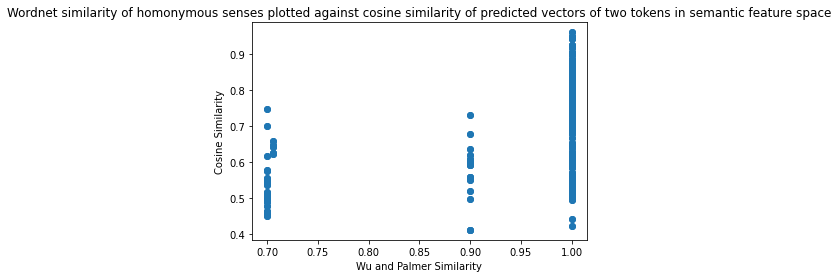

Pearsons correlation: 0.454, p-value: 7.310997784835316e-28
Spearmans correlation: 0.473, p-value: 2.0635281425761226e-30
****************************************
*** doing wu palmer correlation for ../trained_models/model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters ***
****************************************


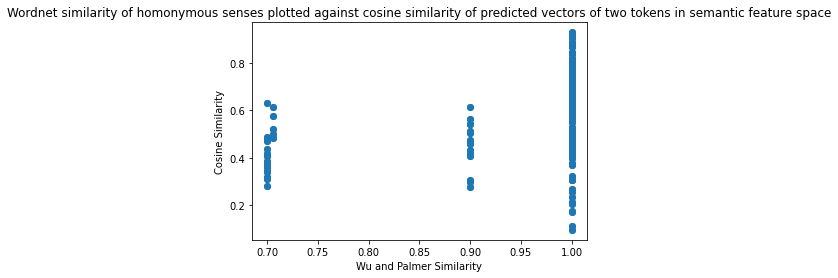

Pearsons correlation: 0.423, p-value: 4.9166237648784835e-24
Spearmans correlation: 0.482, p-value: 1.1396951575555852e-31
****************************************
*** doing wu palmer correlation for ../trained_models/model.ffnn.buchanan.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300 ***
****************************************


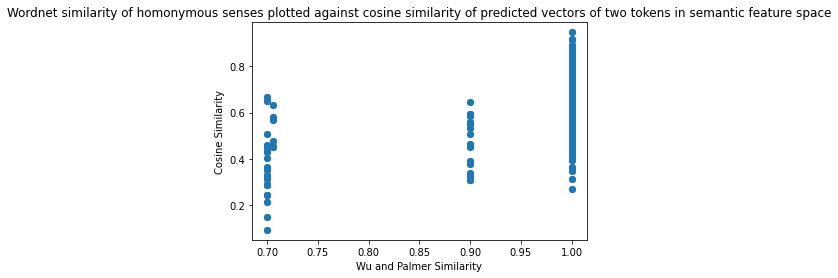

Pearsons correlation: 0.552, p-value: 6.927692706721132e-43
Spearmans correlation: 0.513, p-value: 2.5718846955093886e-36
****************************************
*** doing wu palmer correlation for ../trained_models/model.ffnn.buchanan.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300 ***
****************************************


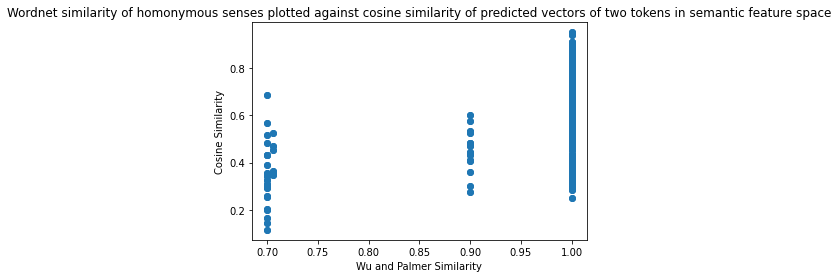

Pearsons correlation: 0.504, p-value: 6.664040934250588e-35
Spearmans correlation: 0.486, p-value: 3.1371114020375304e-32


In [39]:
"""
create a list of predicted feature vectors for each of the models being evaluated
and then stick them in the dataframe
"""

def pluralize(string):
    if string == 'mouse':
        return 'mice'
    else:
        return string + 's'

for save_path in buchanan_models:
    print("****************************************")
    print("*** doing wu palmer correlation for %s ***" % save_path)
    print("****************************************")
    model = torch.load(save_path)
    
    predictions = []
    for index, row in df.iterrows():
            singular = row.wn_lemma.name()
            plural = pluralize(singular)

            try:
                predicted_vector = model.predict_in_context(singular, row.context, bert)
            except:
                predicted_vector = model.predict_in_context(plural, row.context, bert)


            predictions.append(predicted_vector)

    df['predictions'] = predictions
    
    wup_sims, cossine_sims = run_wu_palmer_analysis(df)
    plot_sims(wup_sims, cossine_sims)

    corr, p = pearsonr(wup_sims, cossine_sims)
    print('Pearsons correlation: %.3f, p-value: %s'  % (corr, p))

    corr, p = spearmanr(wup_sims, cossine_sims)
    print('Spearmans correlation: %.3f, p-value: %s'  % (corr, p))

# Run the analysis for the non-contextual model (trained on GloVe)

Here we expect to see no correlation, because the model should be making the same prediction for every token of a word form, irrespective of the surrounding context

****************************************
*** doing wu palmer correlation for ../trained_models/model.ffnn.mc_rae_real.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300 ***
****************************************


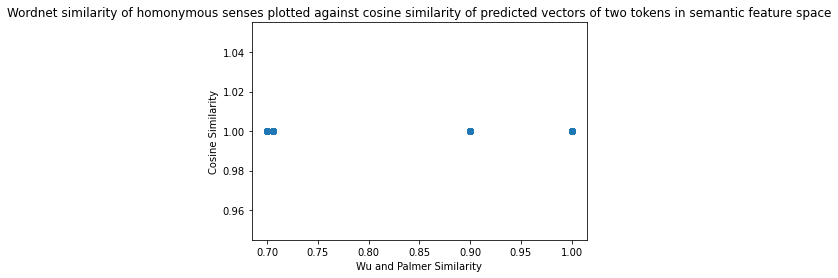

/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Pearsons correlation: nan, p-value: nan
Spearmans correlation: nan, p-value: nan
****************************************
*** doing wu palmer correlation for ../trained_models/model.plsr.mc_rae_real.allbuthomoyms.glove.100components.300max_iters ***
****************************************


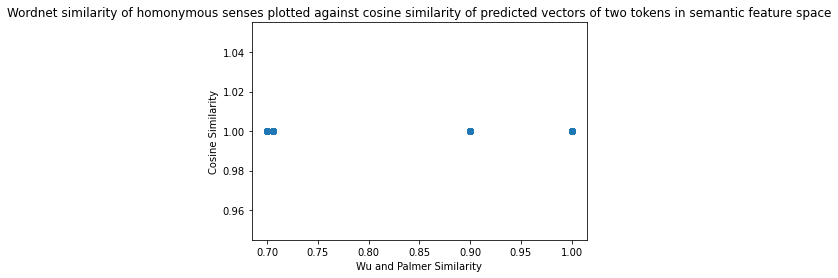

Pearsons correlation: nan, p-value: nan
Spearmans correlation: nan, p-value: nan


/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [40]:
"""
create a list of predicted feature vectors for each of the models being evaluated
and then stick them in the dataframe
"""

for save_path in mcrae_glove_models:
    print("****************************************")
    print("*** doing wu palmer correlation for %s ***" % save_path)
    print("****************************************")
    model = torch.load(save_path)
    
    predictions = []
    for index, row in df.iterrows():
            singular = row.wn_lemma.name()
            plural = pluralize(singular)

            try:
                predicted_vector = model.predict_in_context(singular, row.context, bert, glove=True)
            except:
                predicted_vector = model.predict_in_context(plural, row.context, bert, glove=True)


            predictions.append(predicted_vector)

    df['predictions'] = predictions
    
    wup_sims, cossine_sims = run_wu_palmer_analysis(df)
    plot_sims(wup_sims, cossine_sims)

    corr, p = pearsonr(wup_sims, cossine_sims)
    print('Pearsons correlation: %.3f, p-value: %s'  % (corr, p))

    corr, p = spearmanr(wup_sims, cossine_sims)
    print('Spearmans correlation: %.3f, p-value: %s'  % (corr, p))